In [1]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

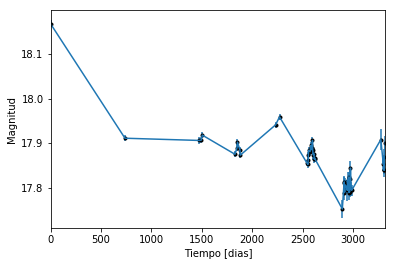

In [3]:
data = np.genfromtxt('LC_2670_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

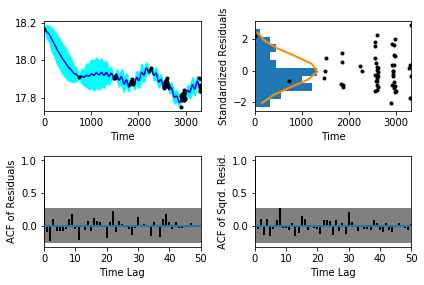

In [6]:
sample.assess_fit()

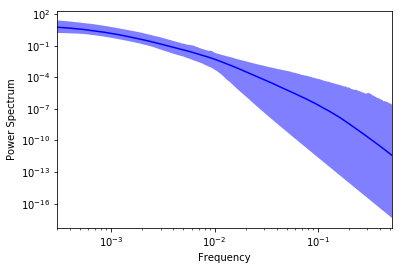

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.011492,'Medida del nivel de ruido')

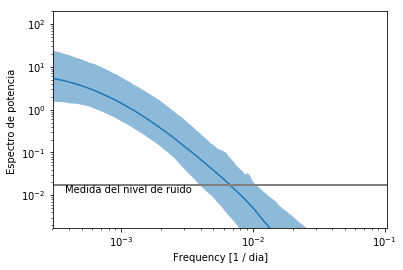

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

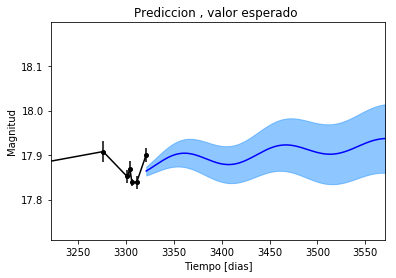

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

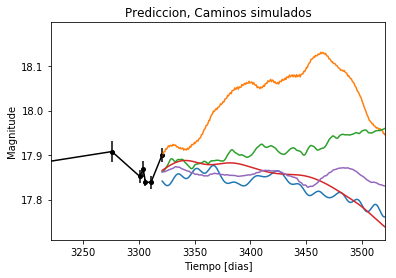

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


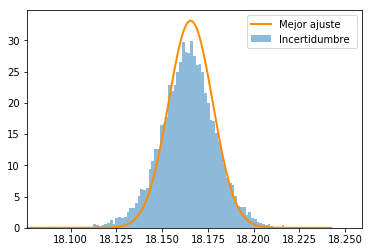

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

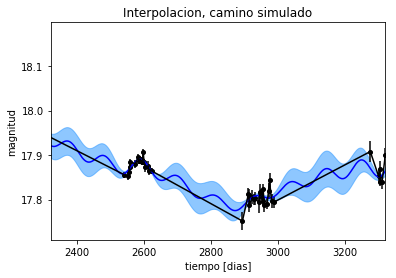

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

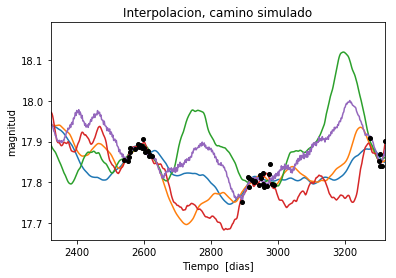

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


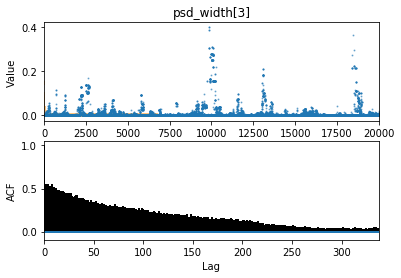

In [16]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [17]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [18]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 601.374958028
Median: 0.0207854951641
Standard deviation: 0.23003768077
68% credibility interval: [ 0.00127718  0.30224786]
95% credibility interval: [  3.56729166e-04   8.62729830e-01]
99% credibility interval: [  3.08896318e-04   1.00935150e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 447.643946284
Median: 0.00285979592029
Standard deviation: 0.0887099393045
68% credibility interval: [ 0.00042519  0.03006342]
95% credibility interval: [ 0.00031406  0.27945394]
99% credibility interval: [  3.03203957e-04   6.46307485e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 281.852875135
Median: 0.0244836055445
Standard d

In [19]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 306.966600956
Median: 0.00682903294418
Standard deviation: 0.229654066846
68% credibility interval: [ 0.          0.29514975]
95% credibility interval: [ 0.          0.87356202]
99% credibility interval: [ 0.          1.01691558]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 306.966600956
Median: 0.00682903294418
Standard deviation: 0.229654066846
68% credibility interval: [ 0.          0.29514975]
95% credibility interval: [ 0.          0.87356202]
99% credibility interval: [ 0.          1.01691558]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1176.03638258
Median: 0.0
Standard deviation: 0.000304461016746
68% 

Plotting parameter summary


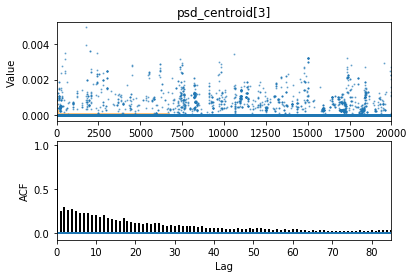

In [21]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [22]:

centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [23]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 521.19698765
Median: 154.399354779
Standard deviation: 1.82977971978
68% credibility interval: [ 152.36218159  155.78289456]
95% credibility interval: [ 149.75571483  156.60680417]
99% credibility interval: [ 147.45248847  157.58940911]


In [24]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [25]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 301.056011443
Median: 0.915703379139
Standard deviation: 2.49277780996
68% credibility interval: [ 0.06725967  4.63886345]
95% credibility interval: [ 0.01400162  8.57536714]
99% credibility interval: [  1.02672199e-02   1.12368419e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 345.561440215
Median: 0.783238250496
Standard deviation: 8.90029891688
68% credibility interval: [ 0.02465327  8.80310745]
95% credibility interval: [  2.2

Plotting parameter summary


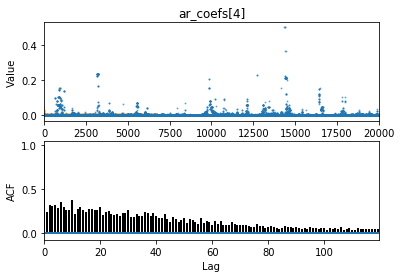

In [26]:
sample.plot_parameter('ar_coefs', 4, doShow=True)

In [27]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [28]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 353.150893127
Median: 1.3214203225e-47
Standard deviation: 4.21175650306e+52
68% credibility interval: [  2.29798161e-100   4.13600195e-012]
95% credibility interval: [  5.73183644e-143   3.98478944e+012]
99% credibility interval: [  1.04644553e-158   1.16319787e+053]


In [29]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [30]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2104.11917749
Median: 17.9310068796
Standard deviation: 0.0544344271565
68% credibility interval: [ 17.88272303  17.97786879]
95% credibility interval: [ 17.82383327  18.04138569]
99% credibility interval: [ 17.76739227  18.09494404]


Plotting parameter summary


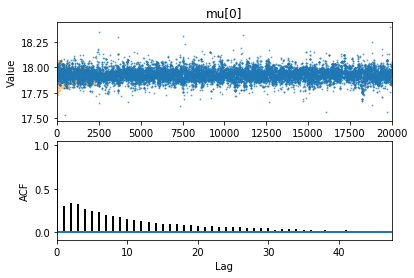

In [31]:
sample.plot_parameter('mu', 0, doShow=True)

In [32]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [33]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 306.966600956
Median: 0.00682903294418
Standard deviation: 0.229654066846
68% credibility interval: [ 0.          0.29514975]
95% credibility interval: [ 0.          0.87356202]
99% credibility interval: [ 0.          1.01691558]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 306.966600956
Median: 0.00682903294418
Standard deviation: 0.229654066846
68% credibility interval: [ 0.          0.29514975]
95% credibility interval: [ 0.          0.87356202]
99% credibility interval: [ 0.          1.01691558]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1176.03638258
Median: 0.0
Standard deviation: 0.000304461016746
68% 

Plotting parameter summary


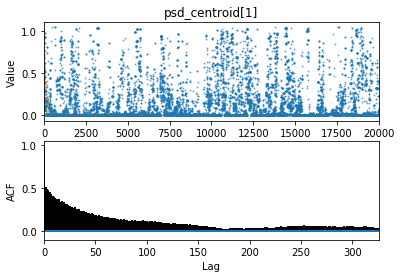

In [34]:
sample.plot_parameter('psd_centroid', 1, doShow=True)

In [35]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [36]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 521.19698765
Median: 154.399354779
Standard deviation: 1.82977971978
68% credibility interval: [ 152.36218159  155.78289456]
95% credibility interval: [ 149.75571483  156.60680417]
99% credibility interval: [ 147.45248847  157.58940911]


Plotting parameter summary


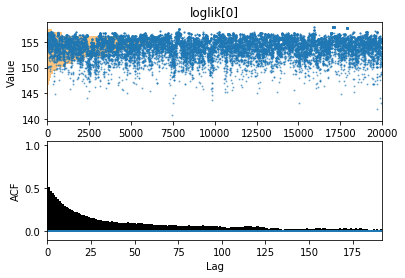

In [37]:
sample.plot_parameter('loglik', 0, doShow=True)

In [38]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [39]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1440.38385991
Median: 0.0112963624337
Standard deviation: 0.0118609238811
68% credibility interval: [ 0.00707243  0.02012815]
95% credibility interval: [ 0.00480268  0.04113805]
99% credibility interval: [ 0.00364574  0.07201319]


Plotting parameter summary


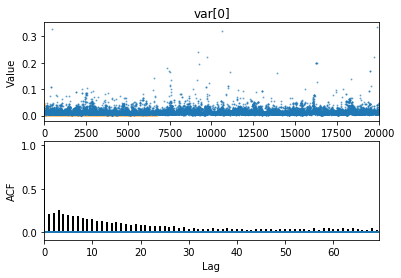

In [40]:
sample.plot_parameter('var', 0, doShow=True)

In [41]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [42]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 810.041145184
Median: 1.14223878456
Standard deviation: 0.20257935763
68% credibility interval: [ 0.95881907  1.35992195]
95% credibility interval: [ 0.81629148  1.60065803]
99% credibility interval: [ 0.72746526  1.77483581]


Plotting parameter summary


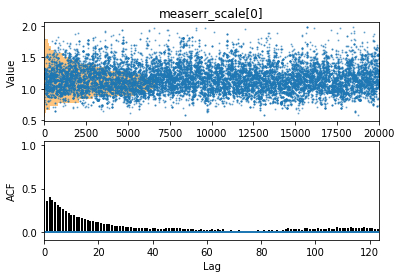

In [43]:
sample.plot_parameter('measerr_scale', 0, doShow=True)

In [44]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [45]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 614.156722228
Median: 0.000240030502245
Standard deviation: 0.0492293210518
68% credibility interval: [  4.42962830e-06   5.07220299e-03]
95% credibility interval: [  9.52389508e-17   6.09893999e-02]
99% credibility interval: [  5.08860005e-58   2.98964639e-01]


Plotting parameter summary


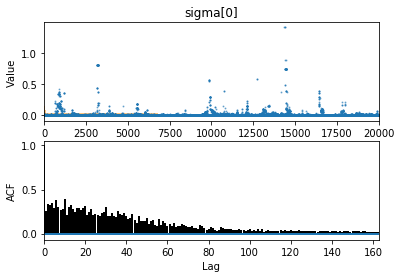

In [46]:
sample.plot_parameter('sigma', 0, doShow=True)

In [47]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [48]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 601.374958028
Median: (-0.130599117818+0j)
Standard deviation: 2.04235733344
68% credibility interval: [-1.89907934-1.01078353j -0.00802475-0.02561109j]
95% credibility interval: [ -5.42069139e+00+0.j          -2.24139545e-03-0.10731798j]
99% credibility interval: [ -6.34194249e+00+0.j          -1.94085281e-03-0.05932674j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 447.643946284
Median: (-0.0179686277079+0.0470674350006j)
Standard deviation: 1.54686922833
68% credibility interval: [-0.18889407+2.92448143j -0.00267157+0.06928593j]
95% credibility interval: [-1.75586087+2.32611754j -0.00197327+0.j        ]
99% credibility interval: [ -4.06086970e+00+5.89800622j  -1.90508665e-03+0.j        ]
Posterior summary for par